# Projeto 02 - bolsa de valores

Passo a passo do problema
* Buscar as informações da ação automaticamente
* Criar as análises solicitadas
  * Cotção máxima
  * Cotação minima
  * Valor médio
* Enviar um e-mail automaticamente para o gestor

In [ ]:
!pip install alpha_vantage

            1. open  2. high    3. low  4. close   5. volume
date                                                        
2024-06-07  426.200   426.28  423.0000    423.85  13621650.0
2024-06-06  424.010   425.31  420.5800    424.52  14861251.0
2024-06-05  417.810   424.08  416.3000    424.01  16988038.0
2024-06-04  412.430   416.44  409.6750    416.07  14348917.0
2024-06-03  415.525   416.43  408.9234    413.52  17484675.0


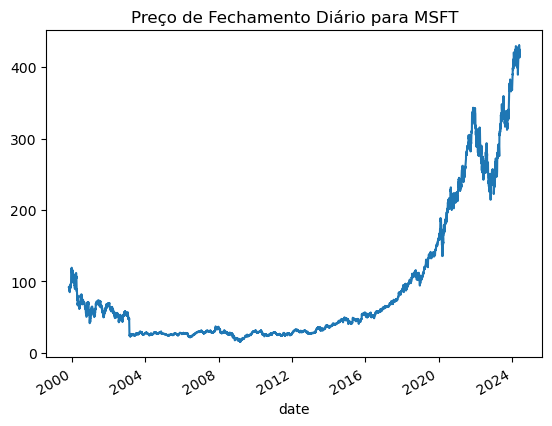

In [6]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

# Sua chave de API
api_key = 'NDPYMVEA4RLSRD17'

# Inicialize a classe TimeSeries com sua chave de API
ts = TimeSeries(key=api_key, output_format='pandas')

# Obtenha dados diários para uma ação específica (por exemplo, Microsoft - MSFT)
data, meta_data = ts.get_daily(symbol='MSFT', outputsize='full')

# Exiba os primeiros dados
print(data.head())

# Visualize os dados
data['4. close'].plot()
plt.title('Preço de Fechamento Diário para MSFT')
plt.show()


#### Use a biblioteca para buscar dados de uma ação específica:

In [ ]:
!pip install yfinance

In [ ]:
!pip install matplotlib

                                 Open        High         Low       Close  \
Date                                                                        
2023-06-08 00:00:00-04:00  321.425620  324.104676  320.840204  322.735382   
2023-06-09 00:00:00-04:00  322.467463  327.428653  321.891978  324.253510   
2023-06-12 00:00:00-04:00  326.029563  329.522260  322.636126  329.274200   
2023-06-13 00:00:00-04:00  331.873908  334.364436  327.825590  331.695312   
2023-06-14 00:00:00-04:00  331.744874  336.408405  330.226751  334.721588   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-06-08 00:00:00-04:00  23277700        0.0           0.0  
2023-06-09 00:00:00-04:00  22514900        0.0           0.0  
2023-06-12 00:00:00-04:00  24260300        0.0           0.0  
2023-06-13 00:00:00-04:00  22951300        0.0           0.0  
2023-06-14 00:00:00-04:00  26003800        0.0           0.0  


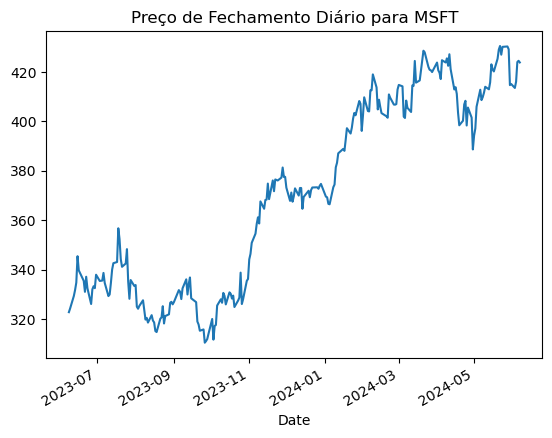

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

# Obtenha dados históricos para uma ação específica (por exemplo, Microsoft - MSFT)
msft = yf.Ticker("MSFT")

# Obtenha o histórico de preços
hist = msft.history(period="1y")

# Exiba os primeiros dados
print(hist.head())

# Visualize os dados
hist['Close'].plot()
plt.title('Preço de Fechamento Diário para MSFT')
plt.show()


#### Cotação máxima, minima e média

In [8]:
from alpha_vantage.timeseries import TimeSeries

# Sua chave de API
api_key = 'NDPYMVEA4RLSRD17'

# Inicialize a classe TimeSeries com sua chave de API
ts = TimeSeries(key=api_key, output_format='pandas')

# Obtenha dados diários para uma ação específica (por exemplo, Microsoft - MSFT)
ticker = input("Digite a ação desejada: ") # 'MSFT'
data, meta_data = ts.get_daily(symbol=str(ticker), outputsize='full')

# Exiba os primeiros dados
print(data.head())

# Calcule a cotação máxima
max_price = data['2. high'].max()
min_price = data['2. high'].min()
mean_price = data['2. high'].mean()

#print(f'A cotação máxima da ação MSFT é: {max_price}')
#print(f'A cotação minima da ação MSFT é: {min_price}')
#print(f'A cotação média da ação MSFT é: {mean_price}')

max_price_formatted = round(max_price, 2)
min_price_formatted = round(min_price, 2)
mean_price_formatted = round(mean_price, 2)

print(f"""
      Ação {ticker}, cotação de fechamento:
      Máxima: {max_price_formatted}
      Minima: {min_price_formatted}
      Média: {mean_price_formatted}
      """)

            1. open  2. high  3. low  4. close   5. volume
date                                                      
2024-06-07    11.44    11.54   11.32     11.35  28272651.0
2024-06-06    11.46    11.67   11.42     11.62  28376176.0
2024-06-05    11.53    11.55   11.36     11.41  29843190.0
2024-06-04    11.60    11.60   11.52     11.54  25738575.0
2024-06-03    11.85    11.93   11.77     11.82  29505619.0

      Ação vale, cotação de fechamento:
      Máxima: 63.5
      Minima: 2.24
      Média: 21.62
      


#### Bibliotecas

In [ ]:
!pip install pyautogui

In [5]:
!pip install pyperclip

In [6]:
!pip install webbrowser

ERROR: Could not find a version that satisfies the requirement webbrowser (from versions: none)
ERROR: No matching distribution found for webbrowser


In [9]:
import pyautogui
import pyperclip
import webbrowser
import time

destinatario = "ederpbj@gmail.com"
assunto = "teste"
mensagem = f"""
  Prezado gestor,

  Seguem as análises solicitadas da ação

  Acção {ticker}
  Cotação máxima: R$ {max_price_formatted}
  Cotação mínima: R$ {min_price_formatted}
  Cotação média: R$ {mean_price_formatted}

Qualquer dúvida, estou à disposição!

Atte
"""
# abrir o navegador e ir para gmail
webbrowser.open("www.gmail.com")
time.sleep(3)

pyautogui.PAUSE = 3

#clicar no botão escrever
pyautogui.click(x=193, y=233)

pyperclip.copy(destinatario)
pyautogui.hotkey("ctrl","v")
pyautogui.hotkey("tab")

pyperclip.copy(assunto)
pyautogui.hotkey("ctrl","v")
pyautogui.hotkey("tab")

pyperclip.copy(mensagem)
pyautogui.hotkey("ctrl","v")
pyautogui.hotkey("tab")

pyautogui.click(x=1205, y=985)

In [ ]:
time.sleep(3)
pyautogui.position()